# Sales Analysis

### Importing necessary libraries

In [5]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

#### Task #1: Merging 12 months of sales data into a single file

In [3]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")
# Will give all the files in "Sales_data directory"
files = [file for file in os.listdir("./Sales_Data")]


df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
# List of files
files

['Sales_December_2019.csv',
 'Sales_April_2019.csv',
 'Sales_February_2019.csv',
 'Sales_March_2019.csv',
 'Sales_August_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_January_2019.csv',
 'Sales_September_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv']

In [5]:
# Combining all into one cvs

# Will give all the files in "Sales_data directory"
files = [file for file in os.listdir("./Sales_Data")]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/" + file)
    all_months_data = pd.concat([all_months_data,df])
    
all_months_data.head()
    

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [6]:
# Saving into one csv
all_months_data.to_csv("all_data.csv",index=False)

#### Read in updated DataFrame

In [7]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Clean up the data!

In [8]:
all_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

##### Drop rows NAN

In [9]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185795,NaN,NaN,NaN,NaN,NaN,NaN
185868,NaN,NaN,NaN,NaN,NaN,NaN
185887,NaN,NaN,NaN,NaN,NaN,NaN
185960,NaN,NaN,NaN,NaN,NaN,NaN


Since the rows are completely blank, lets drop all the rows altogether

In [10]:
all_data = all_data.dropna(how='all')

In [11]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


##### Find Or and delete"

In [12]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']
all_data


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [13]:
##### Convert columns to the correct type
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) # Makes int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) #Makes float

### Augment data with additional columns

#### Task 2: Add Month Column

In [14]:
all_data["Month"] = all_data['Order Date'].str[0:2]
all_data["Month"] = all_data['Month'].astype('int32')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12
...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6


##### Task 3: Add a sales column

In [15]:
all_data["Sales"] = all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [16]:
#### Reordering month wise, in asceding order
all_data.sort_values(['Month'],inplace=True)

In [17]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
140677,144303,iPhone,1,700.00,01/26/19 09:03,"419 Meadow St, San Francisco, CA 94016",1,700.00
143930,147402,Wired Headphones,1,11.99,01/04/19 18:10,"420 Dogwood St, Austin, TX 73301",1,11.99
143931,147403,Apple Airpods Headphones,1,150.00,01/08/19 12:06,"423 5th St, Atlanta, GA 30301",1,150.00
143932,147404,ThinkPad Laptop,1,999.99,01/23/19 10:04,"566 Elm St, New York City, NY 10001",1,999.99
143933,147405,AA Batteries (4-pack),1,3.84,01/16/19 08:43,"26 Forest St, Portland, OR 97035",1,3.84


###### Question 1: What was the best months for sales? How much was earned that month?

In [18]:
groupby = all_data.groupby(all_data['Month']).sum()
groupby

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


In [19]:
# Importing necessary plotting tools
import matplotlib.pyplot as plt
%matplotlib inline


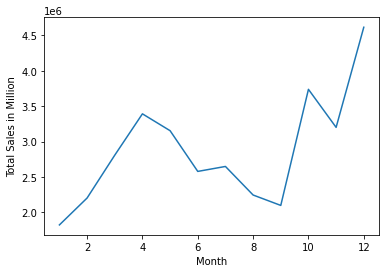

In [20]:
# Line Plot
plt.plot(groupby['Sales'])
plt.xlabel('Month')
plt.ylabel('Total Sales in Million');

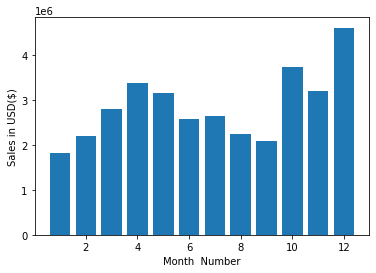

In [21]:
# Bar Plot
plt.bar(groupby.index,groupby['Sales'])
plt.ylabel('Sales in USD($)')
plt.xlabel('Month  Number');

Sales are bad initially, then they rise and during the months of August and September there is a dip and then there is a rise especially during October peaking in December maybe due to Christmas.

##### Question. 2: What city had the highest number of sales?

In [23]:
##### Adding a city column by extracting city from Purchase Address
def get_city(address):
    return address.split(',')[1] # Address is the content of the column, 
                                 #and split helps to split it at commas, 
                                 # and then we take the index [1], 
                                 # becuause the city is after the first comma
def get_state(address):
    return address.split(',')[2][:3]
            
            
all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + " " + get_state(x))

In [24]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
140677,144303,iPhone,1,700.00,01/26/19 09:03,"419 Meadow St, San Francisco, CA 94016",1,700.00,San Francisco CA
143930,147402,Wired Headphones,1,11.99,01/04/19 18:10,"420 Dogwood St, Austin, TX 73301",1,11.99,Austin TX
143931,147403,Apple Airpods Headphones,1,150.00,01/08/19 12:06,"423 5th St, Atlanta, GA 30301",1,150.00,Atlanta GA
143932,147404,ThinkPad Laptop,1,999.99,01/23/19 10:04,"566 Elm St, New York City, NY 10001",1,999.99,New York City NY
143933,147405,AA Batteries (4-pack),1,3.84,01/16/19 08:43,"26 Forest St, Portland, OR 97035",1,3.84,Portland OR


In [25]:
groupby_cities = all_data.groupby('City').sum()

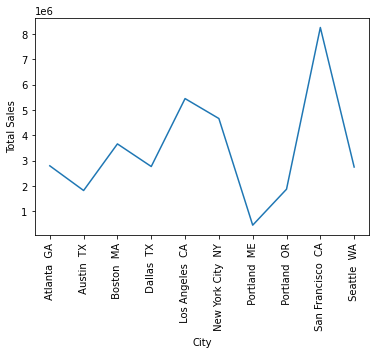

In [26]:
# Plotting
plt.plot(groupby_cities['Sales'])
plt.xticks(rotation=90)
plt.ylabel('Total Sales')
plt.xlabel('City');

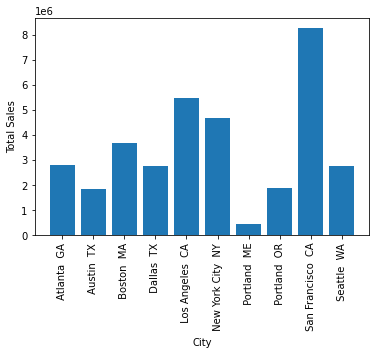

In [27]:
plt.bar(groupby_cities.index,groupby_cities['Sales'])
plt.xticks(rotation=90)
plt.ylabel('Total Sales')
plt.xlabel('City');

SanFransisco the highest performing city. Why? ...

##### Question 3: What time should we display advertisements to maximise likelihood of customer's buying the product?

In [28]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
140677,144303,iPhone,1,700.00,01/26/19 09:03,"419 Meadow St, San Francisco, CA 94016",1,700.00,San Francisco CA
143930,147402,Wired Headphones,1,11.99,01/04/19 18:10,"420 Dogwood St, Austin, TX 73301",1,11.99,Austin TX
143931,147403,Apple Airpods Headphones,1,150.00,01/08/19 12:06,"423 5th St, Atlanta, GA 30301",1,150.00,Atlanta GA
143932,147404,ThinkPad Laptop,1,999.99,01/23/19 10:04,"566 Elm St, New York City, NY 10001",1,999.99,New York City NY
143933,147405,AA Batteries (4-pack),1,3.84,01/16/19 08:43,"26 Forest St, Portland, OR 97035",1,3.84,Portland OR


In [29]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
140677,144303,iPhone,1,700.00,2019-01-26 09:03:00,"419 Meadow St, San Francisco, CA 94016",1,700.00,San Francisco CA
143930,147402,Wired Headphones,1,11.99,2019-01-04 18:10:00,"420 Dogwood St, Austin, TX 73301",1,11.99,Austin TX
143931,147403,Apple Airpods Headphones,1,150.00,2019-01-08 12:06:00,"423 5th St, Atlanta, GA 30301",1,150.00,Atlanta GA
143932,147404,ThinkPad Laptop,1,999.99,2019-01-23 10:04:00,"566 Elm St, New York City, NY 10001",1,999.99,New York City NY
143933,147405,AA Batteries (4-pack),1,3.84,2019-01-16 08:43:00,"26 Forest St, Portland, OR 97035",1,3.84,Portland OR
...,...,...,...,...,...,...,...,...,...
21975,316656,Apple Airpods Headphones,1,150.00,2019-12-08 10:12:00,"564 5th St, San Francisco, CA 94016",12,150.00,San Francisco CA
21974,316655,USB-C Charging Cable,1,11.95,2019-12-01 19:43:00,"951 River St, New York City, NY 10001",12,11.95,New York City NY
21973,316654,Wired Headphones,2,11.99,2019-12-24 11:39:00,"490 Highland St, Los Angeles, CA 90001",12,23.98,Los Angeles CA
21995,316676,Lightning Charging Cable,1,14.95,2019-12-22 02:20:00,"918 1st St, San Francisco, CA 94016",12,14.95,San Francisco CA


In [30]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
140677,144303,iPhone,1,700.00,2019-01-26 09:03:00,"419 Meadow St, San Francisco, CA 94016",1,700.00,San Francisco CA,9,3
143930,147402,Wired Headphones,1,11.99,2019-01-04 18:10:00,"420 Dogwood St, Austin, TX 73301",1,11.99,Austin TX,18,10
143931,147403,Apple Airpods Headphones,1,150.00,2019-01-08 12:06:00,"423 5th St, Atlanta, GA 30301",1,150.00,Atlanta GA,12,6
143932,147404,ThinkPad Laptop,1,999.99,2019-01-23 10:04:00,"566 Elm St, New York City, NY 10001",1,999.99,New York City NY,10,4
143933,147405,AA Batteries (4-pack),1,3.84,2019-01-16 08:43:00,"26 Forest St, Portland, OR 97035",1,3.84,Portland OR,8,43


In [31]:
groupby_hour = all_data.groupby('Hour').sum()
groupby_hour

,Quantity Ordered,Price Each,Month,Sales,Minute
Hour,,,,,
0,4428,709296.70,27554,713721.27,103596
1,2619,458490.00,16657,460866.88,61807
2,1398,233833.64,8507,234851.44,32508
3,928,144726.42,5904,145757.89,23044
4,937,162058.18,6148,162661.01,26876
5,1493,229621.21,9301,230679.82,42877
6,2810,445000.11,17539,448113.00,80343
7,4556,740568.11,28850,744854.12,127447
8,7002,1185970.62,43626,1192348.97,198135


###### Here comparing the quantity ordered and the sales in that hour using a line plot

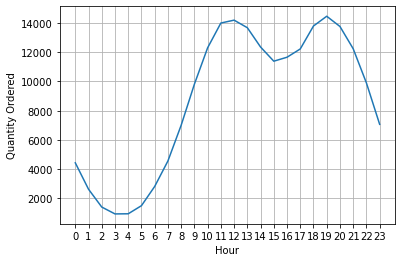

In [32]:
hours = [hour for hour,df in all_data.groupby('Hour')]
# Unpacks the hour index from all_data.groupby('Hour') and returns the list


plt.plot(groupby_hour['Quantity Ordered'])
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Quantity Ordered')
plt.grid();

The peak times are around 12p.m and 7p.m, therefore right before 12 or 7, maybe around 11:45 am and 6:45 pm... Around these times the advertisements should be displayed.

Now this is for all cities together. Maybe I should try for different cities individually.

##### Question 4: What products are most often sold together?

To know which products are often sold together are basically the ones having duplicate order Id's.
Another way can be the the similarity in Order Date and Pruchase Address (both have to coincide). 
However, the latter is tedious and not necessary as the  duplicated ID's are much easily focused upon.

In [44]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df.head()

# This keeps only the duplicated items in the dataframe

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
143971,147439,Vareebadd Phone,1,400.00,2019-01-03 19:06:00,"12 Elm St, Atlanta, GA 30301",1,400.00,Atlanta GA,19,6
143972,147439,USB-C Charging Cable,1,11.95,2019-01-03 19:06:00,"12 Elm St, Atlanta, GA 30301",1,11.95,Atlanta GA,19,6
143977,147444,Vareebadd Phone,1,400.00,2019-01-01 22:37:00,"585 Pine St, Atlanta, GA 30301",1,400.00,Atlanta GA,22,37
143978,147444,USB-C Charging Cable,1,11.95,2019-01-01 22:37:00,"585 Pine St, Atlanta, GA 30301",1,11.95,Atlanta GA,22,37
143955,147425,iPhone,1,700.00,2019-01-26 19:47:00,"112 River St, Seattle, WA 98101",1,700.00,Seattle WA,19,47


In [45]:
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
143971,147439,Vareebadd Phone,1,400.00,2019-01-03 19:06:00,"12 Elm St, Atlanta, GA 30301",1,400.00,Atlanta GA,19,6,"Vareebadd Phone,USB-C Charging Cable"
143972,147439,USB-C Charging Cable,1,11.95,2019-01-03 19:06:00,"12 Elm St, Atlanta, GA 30301",1,11.95,Atlanta GA,19,6,"Vareebadd Phone,USB-C Charging Cable"
143977,147444,Vareebadd Phone,1,400.00,2019-01-01 22:37:00,"585 Pine St, Atlanta, GA 30301",1,400.00,Atlanta GA,22,37,"Vareebadd Phone,USB-C Charging Cable"
143978,147444,USB-C Charging Cable,1,11.95,2019-01-01 22:37:00,"585 Pine St, Atlanta, GA 30301",1,11.95,Atlanta GA,22,37,"Vareebadd Phone,USB-C Charging Cable"
143955,147425,iPhone,1,700.00,2019-01-26 19:47:00,"112 River St, Seattle, WA 98101",1,700.00,Seattle WA,19,47,"iPhone,Lightning Charging Cable"


In [46]:
# df.drop_duplicates('Order ID') - This will remove the duplicates,
# however, it will still keep all the other unnecessary columns in the og df.
# Hence, to filter those we use the following code instead.
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
143971,147439,"Vareebadd Phone,USB-C Charging Cable"
143977,147444,"Vareebadd Phone,USB-C Charging Cable"
143955,147425,"iPhone,Lightning Charging Cable"
143985,147451,"Google Phone,Wired Headphones"
143892,147366,"Wired Headphones,AA Batteries (4-pack)"


###### Count of what products are sold most often together.

In [47]:
from itertools import combinations 
from collections import Counter


In [52]:
from itertools import combinations 
from collections import Counter

count = Counter()

for row in df["Grouped"]:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
    
for key, value in count.most_common(10):
    print(key, value)




('Google Phone', 'USB-C Charging Cable') 571
('iPhone', 'Lightning Charging Cable') 552
('Lightning Charging Cable', 'iPhone') 463
('USB-C Charging Cable', 'Google Phone') 428
('iPhone', 'Wired Headphones') 246
('Google Phone', 'Wired Headphones') 237
('Wired Headphones', 'iPhone') 216
('Vareebadd Phone', 'USB-C Charging Cable') 210
('iPhone', 'Apple Airpods Headphones') 193
('Wired Headphones', 'Google Phone') 186


##### Question 6: What product was sold the most? Why do you think it sold the most? 

In [53]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
140677,144303,iPhone,1,700.00,2019-01-26 09:03:00,"419 Meadow St, San Francisco, CA 94016",1,700.00,San Francisco CA,9,3
143930,147402,Wired Headphones,1,11.99,2019-01-04 18:10:00,"420 Dogwood St, Austin, TX 73301",1,11.99,Austin TX,18,10
143931,147403,Apple Airpods Headphones,1,150.00,2019-01-08 12:06:00,"423 5th St, Atlanta, GA 30301",1,150.00,Atlanta GA,12,6
143932,147404,ThinkPad Laptop,1,999.99,2019-01-23 10:04:00,"566 Elm St, New York City, NY 10001",1,999.99,New York City NY,10,4
143933,147405,AA Batteries (4-pack),1,3.84,2019-01-16 08:43:00,"26 Forest St, Portland, OR 97035",1,3.84,Portland OR,8,43


In [54]:
product_group = all_data.groupby('Product').sum()

product_group

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
Product,,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764,122252
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,142789


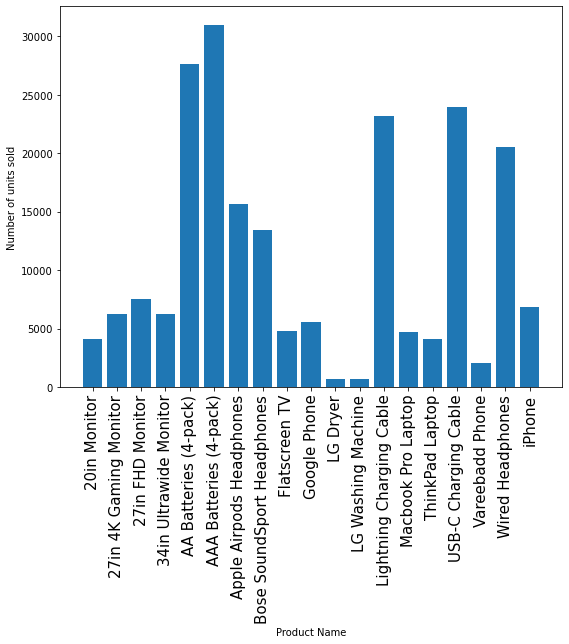

In [65]:
# Plotting in bar 
products = [product for product,df in all_data.groupby('Product')]
plt.figure(figsize=(9,7))
plt.bar(products, product_group['Quantity Ordered'])
plt.xticks(rotation=90)
plt.xticks(fontsize=15)
plt.xlabel('Product Name')
plt.ylabel('Number of units sold');


##### AAA batteries were sold the most

Apart from them, AA batteries, charging cables and headphones. These items are cheap while the others not so much can be one of the reasons.

##### Trying to find mean price of each item sold

In [72]:
product_group['Mean Price'] = round((product_group['Price Each']/product_group['Quantity Ordered']),0).astype('int')
product_group

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute,Mean Price
Product,,,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764,122252,109
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331,389
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948,149
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480,379
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039,3
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113,2
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570,149
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603,99
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,142789,299


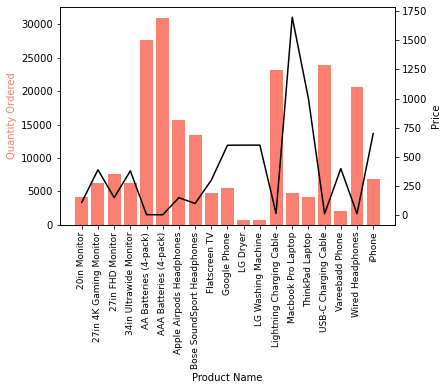

In [87]:
# Plotting in bar 
products = [product for product,df in all_data.groupby('Product')]
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, product_group['Quantity Ordered'], color='salmon')
ax2.plot(products, product_group['Mean Price'], color='black')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='salmon')
ax2.set_ylabel('Price', color='black')
ax1.set_xticklabels(products, rotation='vertical', size=9);

Thus proving the point that the highest sales are in for cheapest items. However, macbook pro, being an extremely famous product sells inspite of being the most expensive one.